In [35]:
import torch
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("darkgrid", {"axes.facecolor": ".9"}); sns.set_context("paper")

In [2]:
import pickle

In [3]:
def load_from_pickle(file_path):
    with open(file_path, "rb") as f:
        return pickle.load(f)

In [139]:
import sys; sys.path.append("../var_dgm")
from var_dgm.utils import seed_everything, compute_individual_returns, compute_portfolio_returns
RANDOM_STATE = 12
context_size = 90
seed_everything(RANDOM_STATE)
DATA_FOLDER = "../../data/"
df = pd.read_csv(DATA_FOLDER + "complete_stocks.csv")
df["Date"] = pd.to_datetime(df["Date"])
n_stocks = 10
tickers = np.random.choice(df["Ticker"].unique(), n_stocks, replace=False)
weights = 1/n_stocks
print("Portfolio = {0}".format(" + ".join([f"{weights} * {i}"for i in tickers])))
df_copy = df.loc[df["Ticker"].isin(tickers)].copy(deep=True)

df_returns = compute_individual_returns(df_copy)
df_returns = compute_portfolio_returns(df_returns)

univariate_target = df_returns["Return_Target"]

univariate_target = univariate_target.values[1:]
train_size = df_returns[df_returns.Date <= "2022-06-01"].index[-1] + 1
test_size = len(univariate_target) - train_size
train = univariate_target[:train_size]

ss = StandardScaler()
train_scaled = torch.tensor(ss.fit_transform(train.reshape(-1, 1)), dtype=torch.float32)

temp = torch.tensor(univariate_target.reshape(-1, 1))
test_data_context = torch.zeros(test_size, context_size, temp.shape[1])
test_data_real = torch.zeros(test_size, 1, temp.shape[1])
for i in range(test_size):
    idx = i + train_size
    test_data_context[i] = temp[idx-context_size:idx]
    test_data_real[i] = temp[idx]

Portfolio = 0.1 * INTC + 0.1 * DHR + 0.1 * COP + 0.1 * MRK + 0.1 * HON + 0.1 * T + 0.1 * MSFT + 0.1 * AXP + 0.1 * PEP + 0.1 * SYK


  0%|          | 0/10 [00:00<?, ?it/s]

In [140]:
test_data_real = test_data_real.flatten()

In [141]:
time_grad_var_1 = load_from_pickle("data/timegrad_var_uni_1.pkl")
time_grad_var_5 = load_from_pickle("data/timegrad_var_uni_5.pkl")
time_grad_es_1 = load_from_pickle("data/timegrad_es_uni_1.pkl")
time_grad_es_5 = load_from_pickle("data/timegrad_es_uni_5.pkl")

time_grad_tuned_var_1 = load_from_pickle("data/timegrad_tuned_var_uni_1.pkl")
time_grad_tuned_var_5 = load_from_pickle("data/timegrad_tuned_var_uni_5.pkl")
time_grad_tuned_es_1 = load_from_pickle("data/timegrad_tuned_es_uni_1.pkl")
time_grad_tuned_es_5 = load_from_pickle("data/timegrad_tuned_es_uni_5.pkl")

histsim_var_1 = load_from_pickle("data/histsim_var_uni_1.pkl")
histsim_var_5 = load_from_pickle("data/histsim_var_uni_5.pkl")
histsim_es_1 = load_from_pickle("data/histsim_es_uni_1.pkl")
histsim_es_5 = load_from_pickle("data/histsim_es_uni_5.pkl")

varcov_var_1 = load_from_pickle("data/varcov_var_uni_1.pkl")
varcov_var_5 = load_from_pickle("data/varcov_var_uni_5.pkl")
varcov_es_1 = load_from_pickle("data/varcov_es_uni_1.pkl")
varcov_es_5 = load_from_pickle("data/varcov_es_uni_5.pkl")

In [142]:
time_grad_tuned_var_1 = ss.inverse_transform(time_grad_tuned_var_1.reshape(-1, 1)).flatten()
time_grad_tuned_es_1 = ss.inverse_transform(time_grad_tuned_es_1.reshape(-1, 1)).flatten()

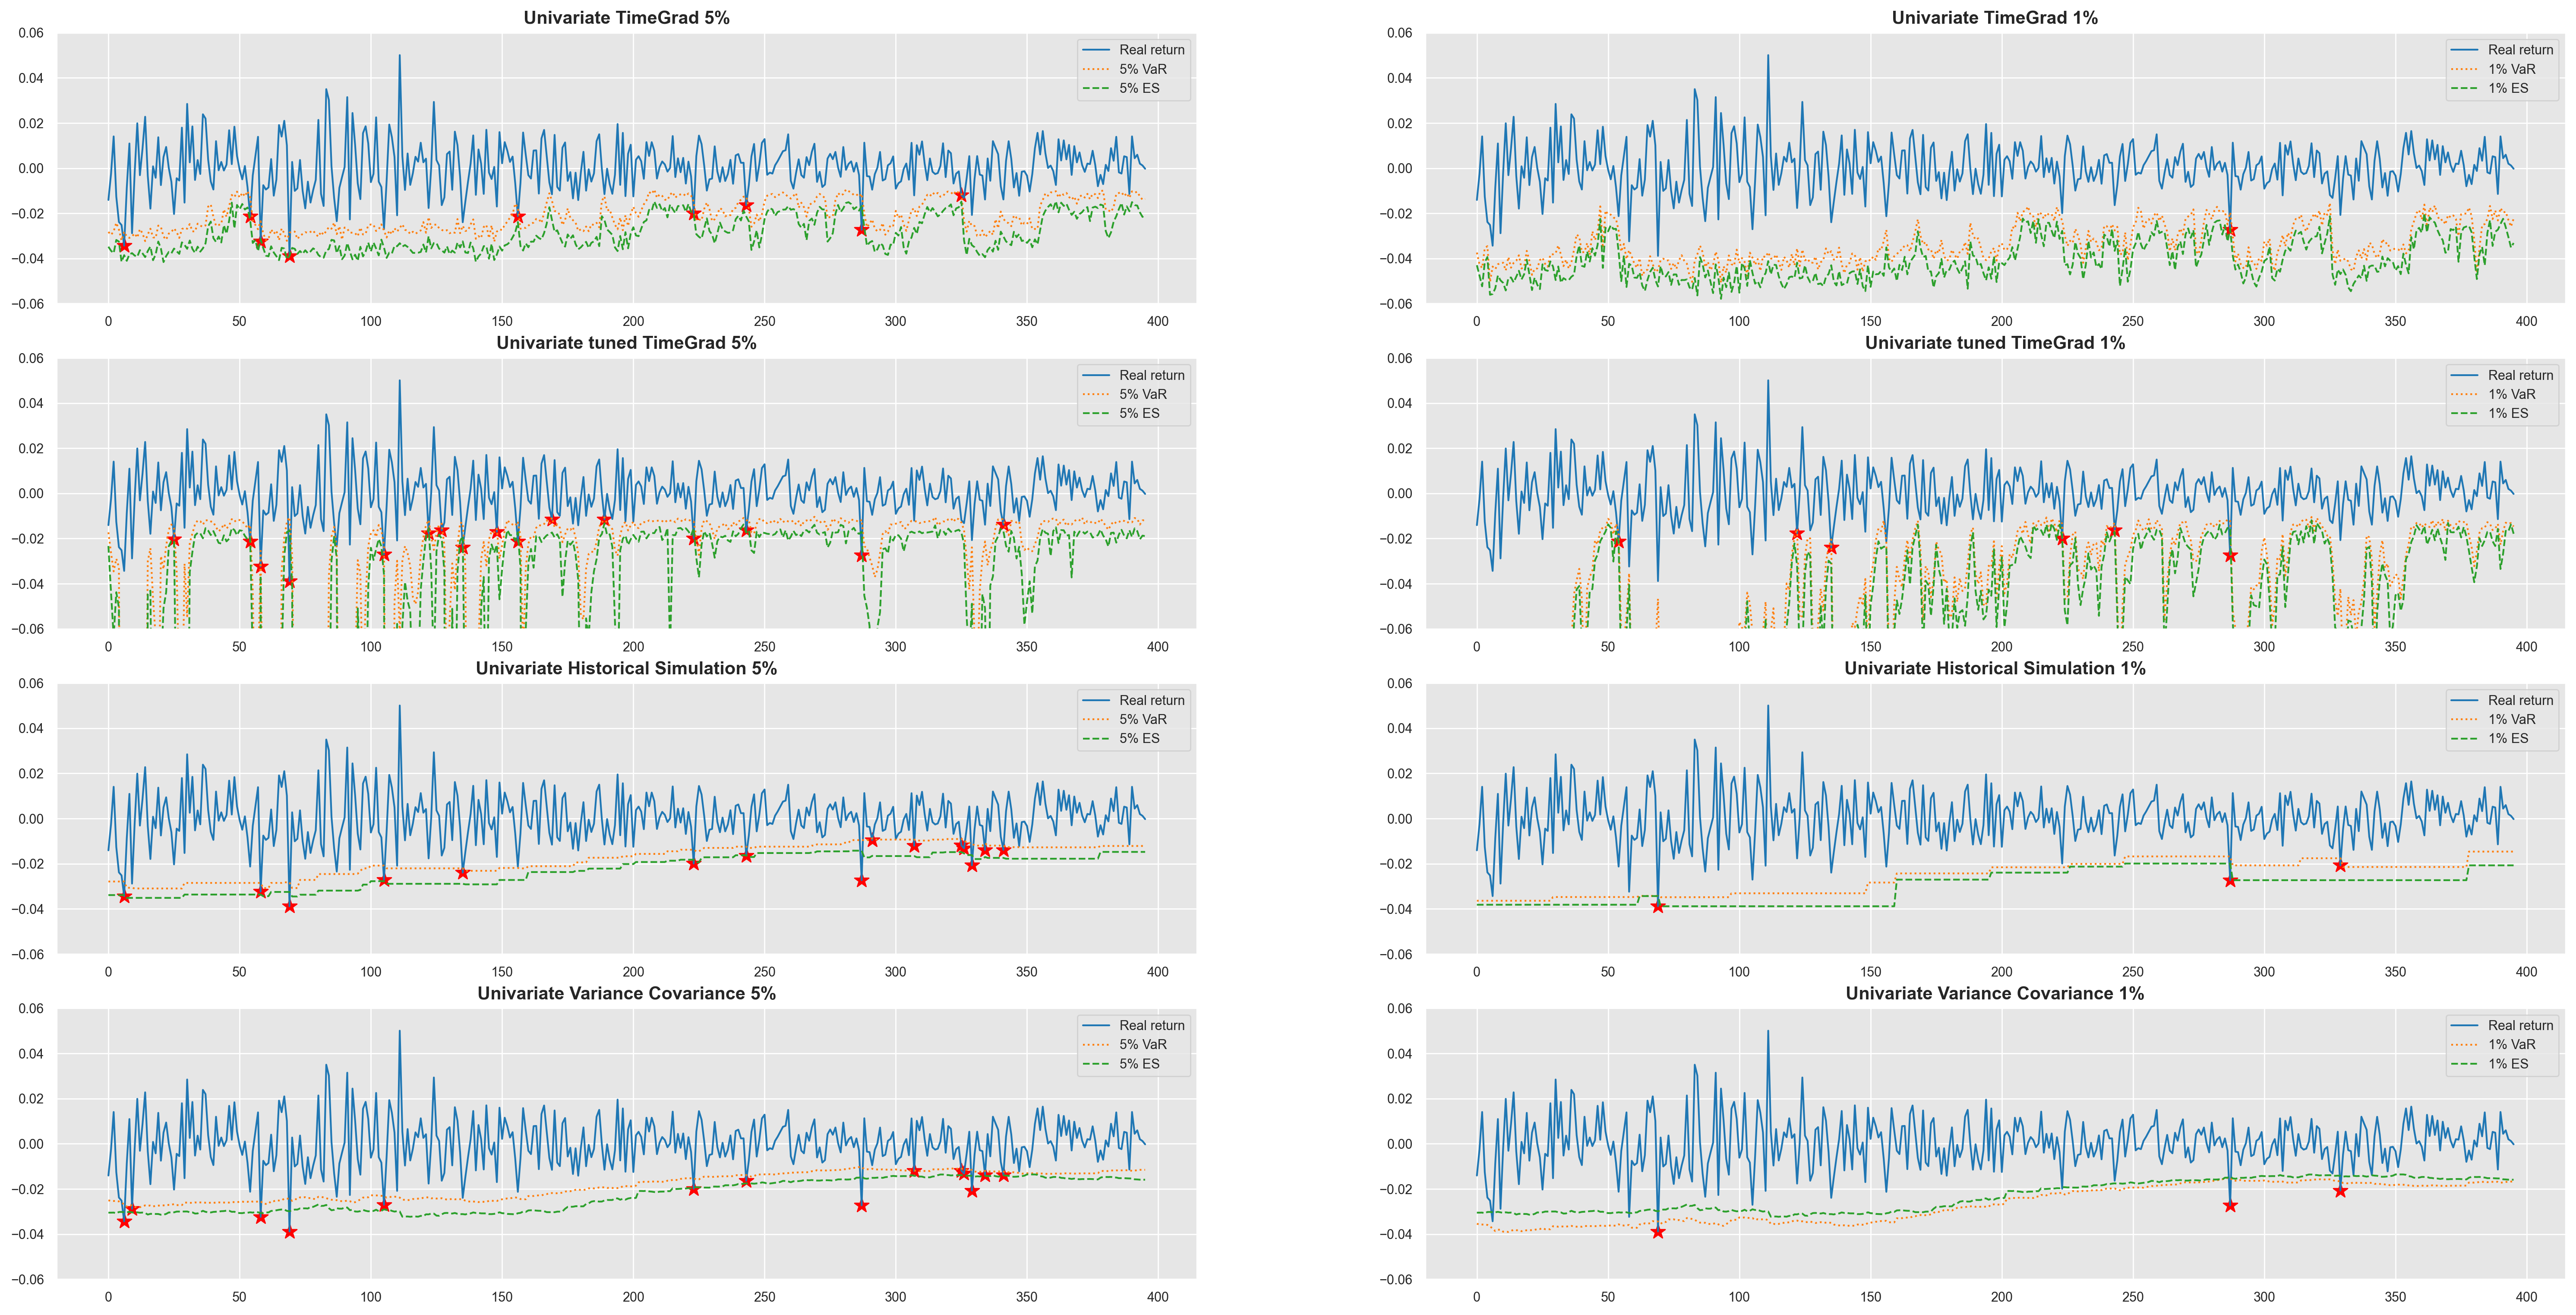

In [143]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(30, 15), dpi=250)



exceptions = np.where(np.array(time_grad_var_5) > np.array(test_data_real))[0]
ax[0][0].plot(np.arange(test_data_real.shape[0]), test_data_real, label="Real return")
ax[0][0].plot(np.arange(test_data_real.shape[0]), time_grad_var_5, label="5% VaR", linestyle=":")
ax[0][0].plot(np.arange(test_data_real.shape[0]), time_grad_es_5, label="5% ES", linestyle="--")
ax[0][0].scatter(exceptions, test_data_real[exceptions], marker="*", s=100, color="red")
ax[0][0].set_ylim(-0.06, 0.06)
ax[0][0].set_title("Univariate TimeGrad 5%", fontweight="bold", fontsize=12)
ax[0][0].legend()

exceptions = np.where(np.array(time_grad_var_1) > np.array(test_data_real))[0]
ax[0][1].plot(np.arange(test_data_real.shape[0]), test_data_real, label="Real return")
ax[0][1].plot(np.arange(test_data_real.shape[0]), time_grad_var_1, label="1% VaR", linestyle=":")
ax[0][1].plot(np.arange(test_data_real.shape[0]), time_grad_es_1, label="1% ES", linestyle="--")
ax[0][1].scatter(exceptions, test_data_real[exceptions], marker="*", s=100, color="red")
ax[0][1].set_ylim(-0.06, 0.06)
ax[0][1].set_title("Univariate TimeGrad 1%", fontweight="bold", fontsize=12)
ax[0][1].legend()

i = 1
exceptions = np.where(np.array(time_grad_tuned_var_5) > np.array(test_data_real))[0]
ax[i][0].plot(np.arange(test_data_real.shape[0]), test_data_real, label="Real return")
ax[i][0].plot(np.arange(test_data_real.shape[0]), time_grad_tuned_var_5, label="5% VaR", linestyle=":")
ax[i][0].plot(np.arange(test_data_real.shape[0]), time_grad_tuned_es_5, label="5% ES", linestyle="--")
ax[i][0].scatter(exceptions, test_data_real[exceptions], marker="*", s=100, color="red")
ax[i][0].set_ylim(-0.06, 0.06)
ax[i][0].set_title("Univariate tuned TimeGrad 5%", fontweight="bold", fontsize=12)
ax[i][0].legend()

exceptions = np.where(np.array(time_grad_tuned_var_1) > np.array(test_data_real))[0]
ax[i][1].plot(np.arange(test_data_real.shape[0]), test_data_real, label="Real return")
ax[i][1].plot(np.arange(test_data_real.shape[0]), time_grad_tuned_var_1, label="1% VaR", linestyle=":")
ax[i][1].plot(np.arange(test_data_real.shape[0]), time_grad_tuned_es_1, label="1% ES", linestyle="--")
ax[i][1].scatter(exceptions, test_data_real[exceptions], marker="*", s=100, color="red")
ax[i][1].set_ylim(-0.06, 0.06)
ax[i][1].set_title("Univariate tuned TimeGrad 1%", fontweight="bold", fontsize=12)
ax[i][1].legend()


i = 2
exceptions = np.where(np.array(histsim_var_5) > np.array(test_data_real))[0]
ax[i][0].plot(np.arange(test_data_real.shape[0]), test_data_real, label="Real return")
ax[i][0].plot(np.arange(test_data_real.shape[0]), histsim_var_5, label="5% VaR", linestyle=":")
ax[i][0].plot(np.arange(test_data_real.shape[0]), histsim_es_5, label="5% ES", linestyle="--")
ax[i][0].scatter(exceptions, test_data_real[exceptions], marker="*", s=100, color="red")
ax[i][0].set_ylim(-0.06, 0.06)
ax[i][0].set_title("Univariate Historical Simulation 5%", fontweight="bold", fontsize=12)
ax[i][0].legend()

exceptions = np.where(np.array(histsim_var_1) > np.array(test_data_real))[0]
ax[i][1].plot(np.arange(test_data_real.shape[0]), test_data_real, label="Real return")
ax[i][1].plot(np.arange(test_data_real.shape[0]), histsim_var_1, label="1% VaR", linestyle=":")
ax[i][1].plot(np.arange(test_data_real.shape[0]), histsim_es_1, label="1% ES", linestyle="--")
ax[i][1].scatter(exceptions, test_data_real[exceptions], marker="*", s=100, color="red")
ax[i][1].set_ylim(-0.06, 0.06)
ax[i][1].set_title("Univariate Historical Simulation 1%", fontweight="bold", fontsize=12)
ax[i][1].legend()


i = 3
exceptions = np.where(np.array(varcov_var_5) > np.array(test_data_real))[0]
ax[i][0].plot(np.arange(test_data_real.shape[0]), test_data_real, label="Real return")
ax[i][0].plot(np.arange(test_data_real.shape[0]), varcov_var_5, label="5% VaR", linestyle=":")
ax[i][0].plot(np.arange(test_data_real.shape[0]), varcov_es_5, label="5% ES", linestyle="--")
ax[i][0].scatter(exceptions, test_data_real[exceptions], marker="*", s=100, color="red")
ax[i][0].set_ylim(-0.06, 0.06)
ax[i][0].set_title("Univariate Variance Covariance 5%", fontweight="bold", fontsize=12)
ax[i][0].legend()

exceptions = np.where(np.array(varcov_var_1) > np.array(test_data_real))[0]
ax[i][1].plot(np.arange(test_data_real.shape[0]), test_data_real, label="Real return")
ax[i][1].plot(np.arange(test_data_real.shape[0]), varcov_var_1, label="1% VaR", linestyle=":")
ax[i][1].plot(np.arange(test_data_real.shape[0]), varcov_es_5, label="1% ES", linestyle="--")
ax[i][1].scatter(exceptions, test_data_real[exceptions], marker="*", s=100, color="red")
ax[i][1].set_ylim(-0.06, 0.06)
ax[i][1].set_title("Univariate Variance Covariance 1%", fontweight="bold", fontsize=12)
ax[i][1].legend()

fig.savefig("../../paper/graphics/univariate.png")

In [144]:
time_grad_var_1 = load_from_pickle("data/timegrad_var_multi_1.pkl")
time_grad_var_5 = load_from_pickle("data/timegrad_var_multi_5.pkl")
time_grad_es_1 = load_from_pickle("data/timegrad_es_multi_1.pkl")
time_grad_es_5 = load_from_pickle("data/timegrad_es_multi_5.pkl")

time_grad_tuned_var_1 = load_from_pickle("data/timegrad_tuned_var_multi_1.pkl")
time_grad_tuned_var_5 = load_from_pickle("data/timegrad_tuned_var_multi_5.pkl")
time_grad_tuned_es_1 = load_from_pickle("data/timegrad_tuned_es_multi_1.pkl")
time_grad_tuned_es_5 = load_from_pickle("data/timegrad_tuned_es_multi_5_tuned.pkl")

histsim_var_1 = load_from_pickle("data/histsim_var_multi_1.pkl")
histsim_var_5 = load_from_pickle("data/histsim_var_multi_5.pkl")
histsim_es_1 = load_from_pickle("data/histsim_es_multi_1.pkl")
histsim_es_5 = load_from_pickle("data/histsim_es_multi_5.pkl")

varcov_var_1 = load_from_pickle("data/varcov_var_multi_1.pkl")
varcov_var_5 = load_from_pickle("data/varcov_var_multi_5.pkl")
varcov_es_1 = load_from_pickle("data/varcov_es_multi_1.pkl")
varcov_es_5 = load_from_pickle("data/varcov_es_multi_5.pkl")

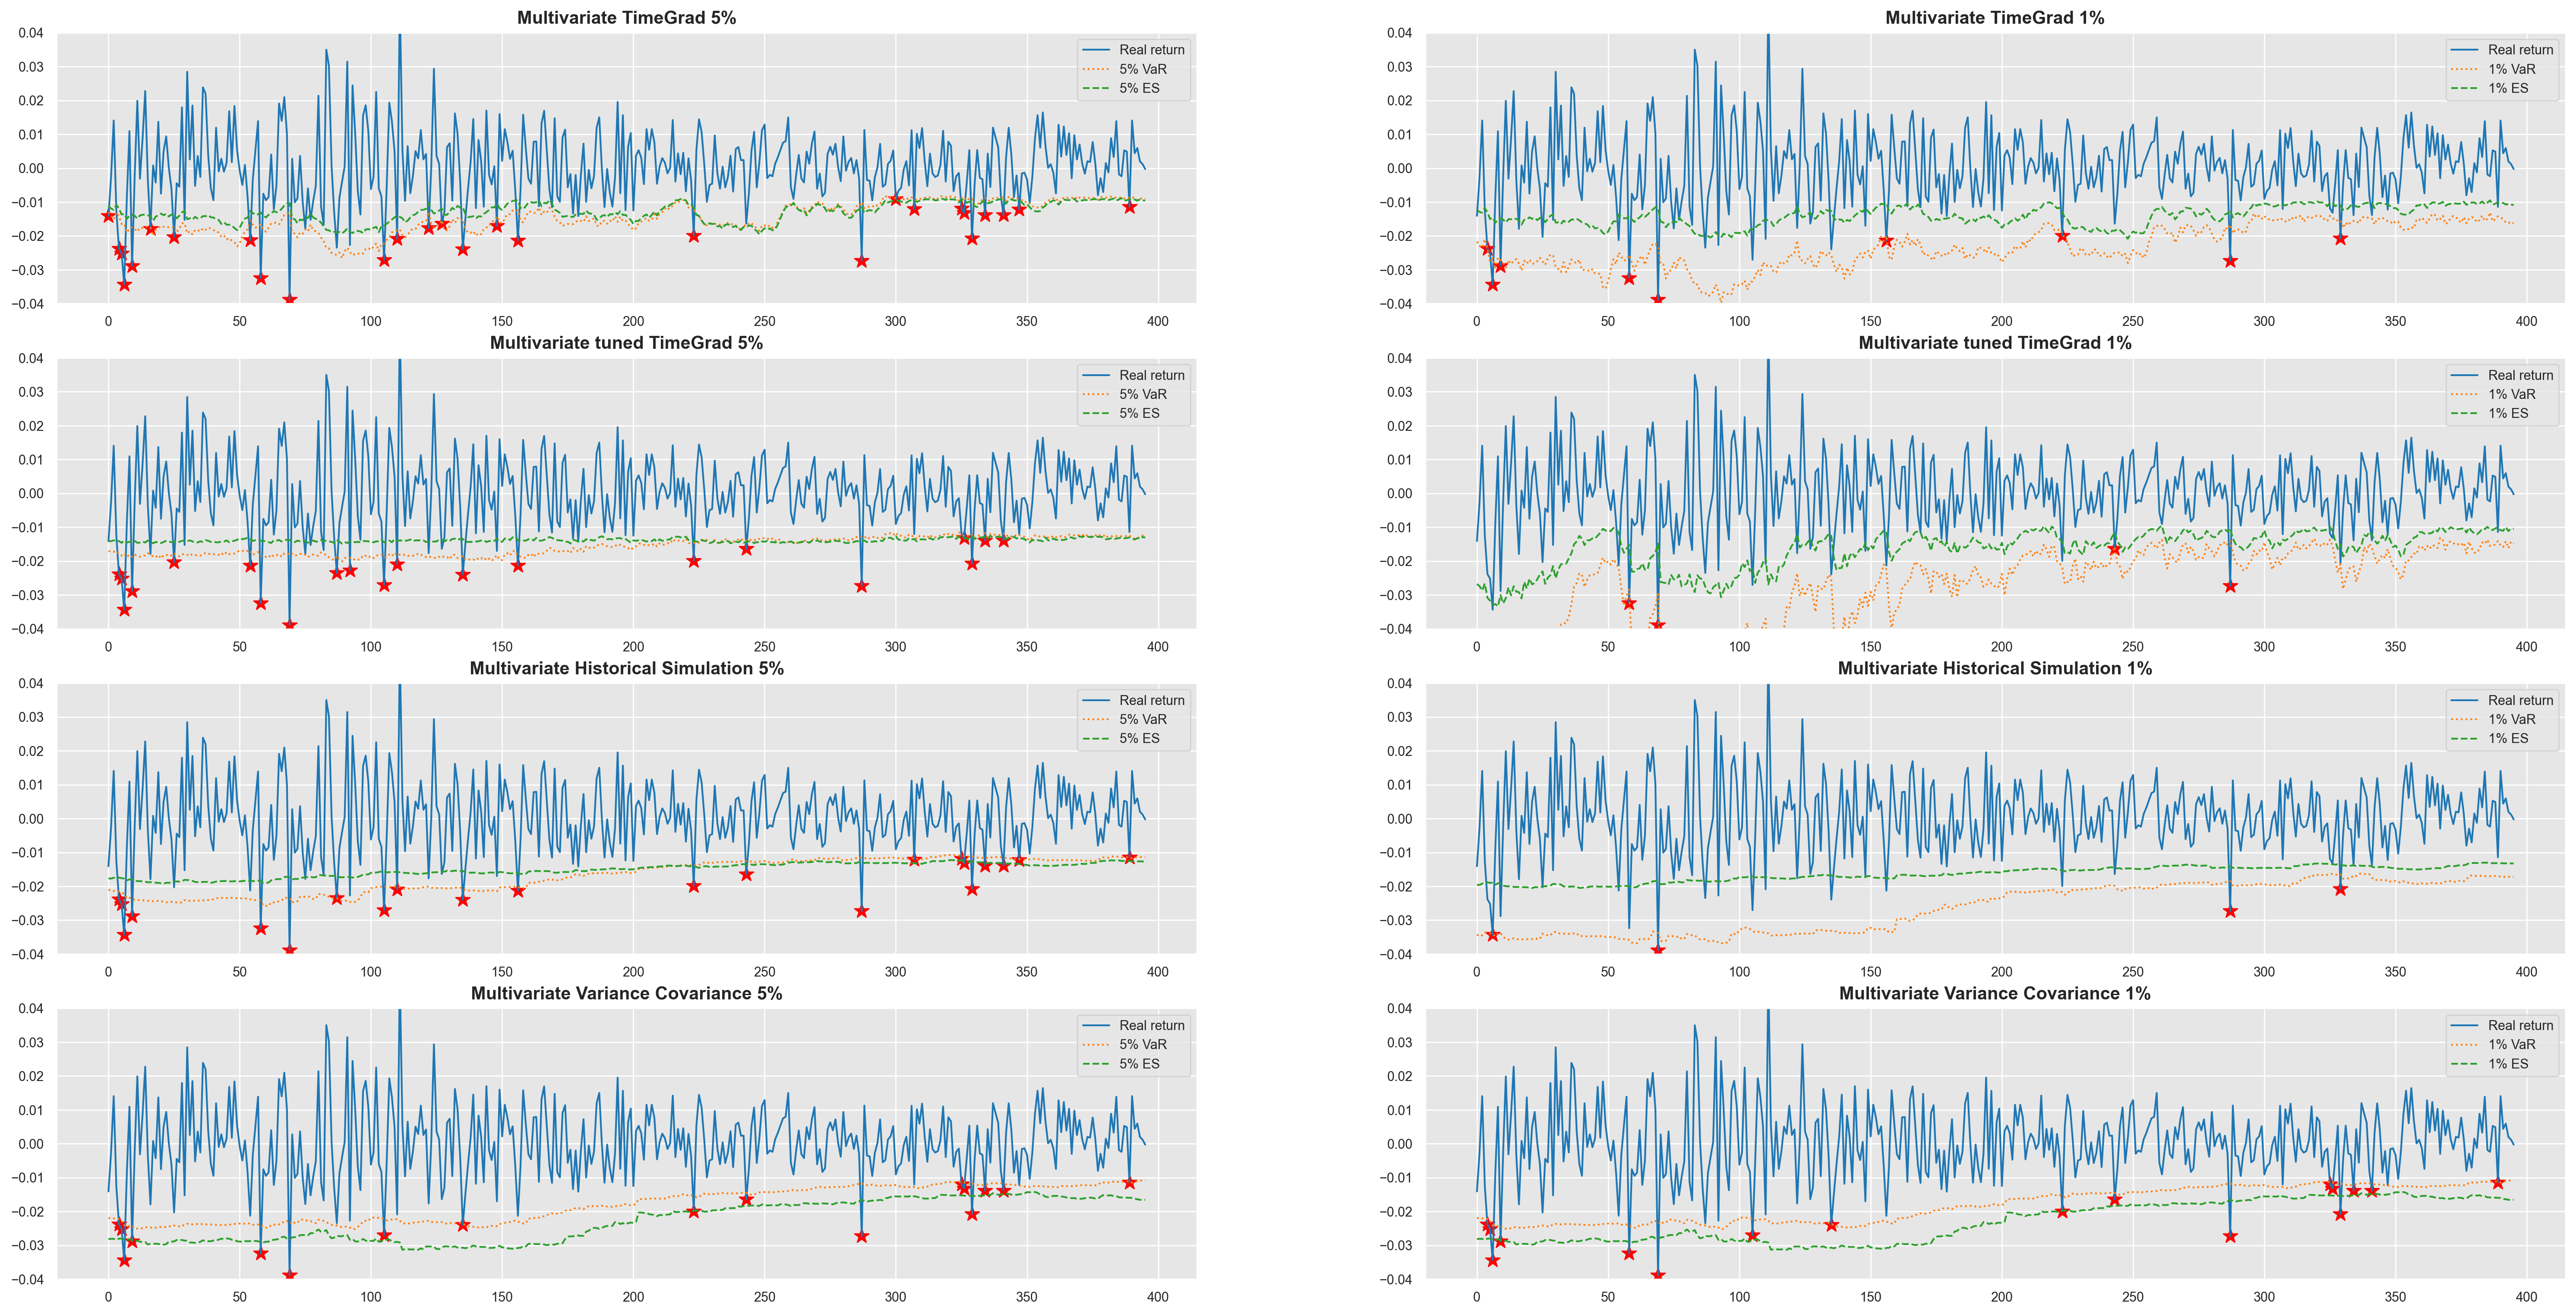

In [145]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(30, 15), dpi=250)



exceptions = np.where(np.array(time_grad_var_5) > np.array(test_data_real))[0]
ax[0][0].plot(np.arange(test_data_real.shape[0]), test_data_real, label="Real return")
ax[0][0].plot(np.arange(test_data_real.shape[0]), time_grad_var_5, label="5% VaR", linestyle=":")
ax[0][0].plot(np.arange(test_data_real.shape[0]), time_grad_es_5, label="5% ES", linestyle="--")
ax[0][0].scatter(exceptions, test_data_real[exceptions], marker="*", s=100, color="red")
ax[0][0].set_ylim(-0.04, 0.04)
ax[0][0].set_title("Multivariate TimeGrad 5%", fontweight="bold", fontsize=12)
ax[0][0].legend()

exceptions = np.where(np.array(time_grad_var_1) > np.array(test_data_real))[0]
ax[0][1].plot(np.arange(test_data_real.shape[0]), test_data_real, label="Real return")
ax[0][1].plot(np.arange(test_data_real.shape[0]), time_grad_var_1, label="1% VaR", linestyle=":")
ax[0][1].plot(np.arange(test_data_real.shape[0]), time_grad_es_1, label="1% ES", linestyle="--")
ax[0][1].scatter(exceptions, test_data_real[exceptions], marker="*", s=100, color="red")
ax[0][1].set_ylim(-0.04, 0.04)
ax[0][1].set_title("Multivariate TimeGrad 1%", fontweight="bold", fontsize=12)
ax[0][1].legend()

i = 1
exceptions = np.where(np.array(time_grad_tuned_var_5) > np.array(test_data_real))[0]
ax[i][0].plot(np.arange(test_data_real.shape[0]), test_data_real, label="Real return")
ax[i][0].plot(np.arange(test_data_real.shape[0]), time_grad_tuned_var_5, label="5% VaR", linestyle=":")
ax[i][0].plot(np.arange(test_data_real.shape[0]), time_grad_tuned_es_5, label="5% ES", linestyle="--")
ax[i][0].scatter(exceptions, test_data_real[exceptions], marker="*", s=100, color="red")
ax[i][0].set_ylim(-0.04, 0.04)
ax[i][0].set_title("Multivariate tuned TimeGrad 5%", fontweight="bold", fontsize=12)
ax[i][0].legend()

exceptions = np.where(np.array(time_grad_tuned_var_1) > np.array(test_data_real))[0]
ax[i][1].plot(np.arange(test_data_real.shape[0]), test_data_real, label="Real return")
ax[i][1].plot(np.arange(test_data_real.shape[0]), time_grad_tuned_var_1, label="1% VaR", linestyle=":")
ax[i][1].plot(np.arange(test_data_real.shape[0]), time_grad_tuned_es_1, label="1% ES", linestyle="--")
ax[i][1].scatter(exceptions, test_data_real[exceptions], marker="*", s=100, color="red")
ax[i][1].set_ylim(-0.04, 0.04)
ax[i][1].set_title("Multivariate tuned TimeGrad 1%", fontweight="bold", fontsize=12)
ax[i][1].legend()


i = 2
exceptions = np.where(np.array(histsim_var_5) > np.array(test_data_real))[0]
ax[i][0].plot(np.arange(test_data_real.shape[0]), test_data_real, label="Real return")
ax[i][0].plot(np.arange(test_data_real.shape[0]), histsim_var_5, label="5% VaR", linestyle=":")
ax[i][0].plot(np.arange(test_data_real.shape[0]), histsim_es_5, label="5% ES", linestyle="--")
ax[i][0].scatter(exceptions, test_data_real[exceptions], marker="*", s=100, color="red")
ax[i][0].set_ylim(-0.04, 0.04)
ax[i][0].set_title("Multivariate Historical Simulation 5%", fontweight="bold", fontsize=12)
ax[i][0].legend()

exceptions = np.where(np.array(histsim_var_1) > np.array(test_data_real))[0]
ax[i][1].plot(np.arange(test_data_real.shape[0]), test_data_real, label="Real return")
ax[i][1].plot(np.arange(test_data_real.shape[0]), histsim_var_1, label="1% VaR", linestyle=":")
ax[i][1].plot(np.arange(test_data_real.shape[0]), histsim_es_1, label="1% ES", linestyle="--")
ax[i][1].scatter(exceptions, test_data_real[exceptions], marker="*", s=100, color="red")
ax[i][1].set_ylim(-0.04, 0.04)
ax[i][1].set_title("Multivariate Historical Simulation 1%", fontweight="bold", fontsize=12)
ax[i][1].legend()


i = 3
exceptions = np.where(np.array(varcov_var_5) > np.array(test_data_real))[0]
ax[i][0].plot(np.arange(test_data_real.shape[0]), test_data_real, label="Real return")
ax[i][0].plot(np.arange(test_data_real.shape[0]), varcov_var_5, label="5% VaR", linestyle=":")
ax[i][0].plot(np.arange(test_data_real.shape[0]), varcov_es_5, label="5% ES", linestyle="--")
ax[i][0].scatter(exceptions, test_data_real[exceptions], marker="*", s=100, color="red")
ax[i][0].set_ylim(-0.04, 0.04)
ax[i][0].set_title("Multivariate Variance Covariance 5%", fontweight="bold", fontsize=12)
ax[i][0].legend()

exceptions = np.where(np.array(varcov_var_1) > np.array(test_data_real))[0]
ax[i][1].plot(np.arange(test_data_real.shape[0]), test_data_real, label="Real return")
ax[i][1].plot(np.arange(test_data_real.shape[0]), varcov_var_1, label="1% VaR", linestyle=":")
ax[i][1].plot(np.arange(test_data_real.shape[0]), varcov_es_1, label="1% ES", linestyle="--")
ax[i][1].scatter(exceptions, test_data_real[exceptions], marker="*", s=100, color="red")
ax[i][1].set_ylim(-0.04, 0.04)
ax[i][1].set_title("Multivariate Variance Covariance 1%", fontweight="bold", fontsize=12)
ax[i][1].legend()

fig.savefig("../../paper/graphics/multivariate.png")